# Data Preproccesing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg

In [ ]:
data = pd.read_csv('/content/multilabel_missing-filled.csv')
data.head()

,id,side,subset,filename,kl_grade,osteophytes,jsn,osfl,scfl,cyfl,...,cytm,attm,osfm,scfm,cyfm,ostl,sctl,cytl,attl,actual_path
0,9000099,L,train,9000099L.png,3,def,severe,2.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
1,9000099,R,train,9000099R.png,2,def,mild/mod,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
2,9000296,L,train,9000296L.png,3,poss,def,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
3,9000296,R,train,9000296R.png,2,def,none,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
4,9000622,L,train,9000622L.png,1,none,none,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...


In [ ]:
'''
 print(data["osteophytes"])
 for x in data["osteophytes"]:
  if data["osteophytes"][x] == "def":
    data["osteophytes"][x] = 2
  elif data["osteophytes"][x] == "poss":
    data["osteophytes"][x] = 1
  elif data["osteophytes"][x] == "none":
    data["osteophytes"][x] = 0
  else:
    data["osteophytes"][x] = data["osteophytes"][x]
'''


'\n print(data["osteophytes"])\n for x in data["osteophytes"]:\n  if data["osteophytes"][x] == "def":\n    data["osteophytes"][x] = 2\n  elif data["osteophytes"][x] == "poss":\n    data["osteophytes"][x] = 1\n  elif data["osteophytes"][x] == "none":\n    data["osteophytes"][x] = 0\n  else:\n    data["osteophytes"][x] = data["osteophytes"][x]\n'

In [ ]:
data["osteophytes"].replace(to_replace = "def", value = 0, inplace = True)
data["osteophytes"].replace(to_replace = "poss", value = 1, inplace = True)
data["osteophytes"].replace(to_replace = "none", value = 2, inplace = True)
data["osteophytes"]

0       0
1       0
2       1
3       0
4       2
       ..
8255    0
8256    0
8257    0
8258    1
8259    0
Name: osteophytes, Length: 8260, dtype: int64

In [ ]:
data["jsn"].replace(to_replace = "def", value = 3, inplace = True)
data["jsn"].replace(to_replace = "severe", value = 2, inplace = True)
data["jsn"].replace(to_replace = "mild/mod", value = 1, inplace = True)
data["jsn"].replace(to_replace = "none", value = 0, inplace = True)
data["jsn"]

0       2
1       1
2       3
3       0
4       0
       ..
8255    1
8256    0
8257    0
8258    3
8259    0
Name: jsn, Length: 8260, dtype: int64

In [ ]:
data

,id,side,subset,filename,kl_grade,osteophytes,jsn,osfl,scfl,cyfl,...,cytm,attm,osfm,scfm,cyfm,ostl,sctl,cytl,attl,actual_path
0,9000099,L,train,9000099L.png,3,0,2,2.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
1,9000099,R,train,9000099R.png,2,0,1,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
2,9000296,L,train,9000296L.png,3,1,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
3,9000296,R,train,9000296R.png,2,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
4,9000622,L,train,9000622L.png,1,2,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,9999862,R,test,9999862R.png,2,0,1,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
8256,9999865,L,val,9999865L.png,1,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/kaggle/input/knee-osteoarthritis-dataset-with...
8257,9999865,R,val,9999865R.png,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/kaggle/input/knee-osteoarthritis-dataset-with...
8258,9999878,L,train,9999878L.png,1,1,3,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...


In [ ]:
#data.corr(["kl_grade", "osteophytes"])
data.drop("id", axis = 1, inplace = True)
data.drop("side", axis = 1, inplace = True)
data.drop("subset", axis = 1, inplace = True)
data.drop("filename", axis = 1, inplace = True)
data.drop("actual_path", axis = 1, inplace = True)
data.corr(method='pearson')



,kl_grade,osteophytes,jsn,osfl,scfl,cyfl,ostm,sctm,cytm,attm,osfm,scfm,cyfm,ostl,sctl,cytl,attl
kl_grade,1.000000,-0.581565,0.300443,0.541009,0.333902,0.054227,0.641366,0.610073,0.185978,0.134476,0.634183,0.597976,0.097072,0.514182,0.330952,0.102445,0.106665
osteophytes,-0.581565,1.000000,-0.090985,-0.370886,-0.181859,-0.014562,-0.430002,-0.351375,-0.106416,-0.063784,-0.409416,-0.335492,-0.039011,-0.387262,-0.183657,-0.058521,-0.050333
jsn,0.300443,-0.090985,1.000000,0.136934,0.165648,0.029125,0.197607,0.268237,0.075367,0.066983,0.181072,0.280037,0.058910,0.105174,0.159502,0.035724,0.054386
osfl,0.541009,-0.370886,0.136934,1.000000,0.483156,0.080262,0.367722,0.274382,0.084708,0.126108,0.526395,0.262730,0.023621,0.633679,0.470975,0.154022,0.162670
scfl,0.333902,-0.181859,0.165648,0.483156,1.000000,0.149264,0.076521,-0.044435,0.001164,0.005940,0.174966,-0.057280,-0.017705,0.491734,0.929300,0.182960,0.271334
cyfl,0.054227,-0.014562,0.029125,0.080262,0.149264,1.000000,0.000184,-0.018365,0.037469,-0.002570,0.032881,-0.017905,-0.002887,0.062382,0.127385,0.097592,0.156431
ostm,0.641366,-0.430002,0.197607,0.367722,0.076521,0.000184,1.000000,0.627237,0.183439,0.216410,0.597936,0.582232,0.072603,0.312471,0.078178,0.057282,0.039869
sctm,0.610073,-0.351375,0.268237,0.274382,-0.044435,-0.018365,0.627237,1.000000,0.263100,0.203365,0.580884,0.885957,0.137247,0.218155,-0.049373,0.031997,-0.009739
cytm,0.185978,-0.106416,0.075367,0.084708,0.001164,0.037469,0.183439,0.263100,1.000000,0.039307,0.178571,0.229834,0.122845,0.063519,-0.000165,0.064092,0.013646
attm,0.134476,-0.063784,0.066983,0.126108,0.005940,-0.002570,0.216410,0.203365,0.039307,1.000000,0.169206,0.183171,0.050569,0.061858,0.018671,0.014412,0.037395


In [ ]:
data2 = pd.read_csv('/content/clinical_info(in).csv')
data2.head()


,ID,SIDE,FILENAME,AGE,HEIGHT,WEIGHT,MAX WEIGHT,BMI,FREQUENT PAIN,SURGERY,RISK,SXKOA,SWELLING,BENDING FULLY,SYMPTOMATIC,CREPITUS,KOOS PAIN SCORE
0,9000099,LEFT,9000099L.png,59,181.10,78.1,90.9,23.8,5: Freq pain both knees,1: Yes,5: Progression cohort,3: Both knees,0: Never,0: Always,1: Yes,1: Yes,100.0
1,9000099,RIGHT,9000099R.png,59,181.10,78.1,90.9,23.8,5: Freq pain both knees,1: Yes,5: Progression cohort,3: Both knees,0: Never,4: Never,1: Yes,1: Yes,77.8
2,9000296,LEFT,9000296L.png,69,168.20,84.3,84.1,29.8,0: No pain either knee,1: Yes,2: Incidence cohort: Risk factors only,0: Neither,0: Never,0: Always,0: No,0: No,100.0
3,9000296,RIGHT,9000296R.png,69,168.20,84.3,84.1,29.8,0: No pain either knee,1: Yes,2: Incidence cohort: Risk factors only,0: Neither,0: Never,0: Always,0: No,0: No,100.0
4,9000622,LEFT,9000622L.png,71,158.75,57.2,62.3,22.7,"3: Freq pain 1 knee, no pain other knee",0: No,5: Progression cohort,1: Right knee only,0: Never,0: Always,0: No,0: No,100.0


In [ ]:
#data2.drop("ID", axis = 1, inplace = True)
#data2.drop(["SIDE","FILENAME"], axis = 1, inplace = True)
data2.head()


,ID,SIDE,FILENAME,AGE,HEIGHT,WEIGHT,MAX WEIGHT,BMI,FREQUENT PAIN,SURGERY,RISK,SXKOA,SWELLING,BENDING FULLY,SYMPTOMATIC,CREPITUS,KOOS PAIN SCORE
0,9000099,LEFT,9000099L.png,59,181.10,78.1,90.9,23.8,5: Freq pain both knees,1: Yes,5: Progression cohort,3: Both knees,0: Never,0: Always,1: Yes,1: Yes,100.0
1,9000099,RIGHT,9000099R.png,59,181.10,78.1,90.9,23.8,5: Freq pain both knees,1: Yes,5: Progression cohort,3: Both knees,0: Never,4: Never,1: Yes,1: Yes,77.8
2,9000296,LEFT,9000296L.png,69,168.20,84.3,84.1,29.8,0: No pain either knee,1: Yes,2: Incidence cohort: Risk factors only,0: Neither,0: Never,0: Always,0: No,0: No,100.0
3,9000296,RIGHT,9000296R.png,69,168.20,84.3,84.1,29.8,0: No pain either knee,1: Yes,2: Incidence cohort: Risk factors only,0: Neither,0: Never,0: Always,0: No,0: No,100.0
4,9000622,LEFT,9000622L.png,71,158.75,57.2,62.3,22.7,"3: Freq pain 1 knee, no pain other knee",0: No,5: Progression cohort,1: Right knee only,0: Never,0: Always,0: No,0: No,100.0


In [ ]:
data2["FREQUENT PAIN"].nunique()

6

In [ ]:
data2["FREQUENT PAIN"].replace(to_replace = "5: Freq pain both knees", value = 5, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "4: Freq pain 1 knee, infreq pain other knee", value = 4, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "3: Freq pain 1 knee, no pain other knee", value = 3, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "2: Infreq pain both knees", value = 2, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "1: Infreq pain 1 knee, no pain other knee", value = 1, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "0: No pain either knee", value = 0, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "None", value = 0, inplace = True) # In case there are any "None" values
data2["FREQUENT PAIN"].info() # check to see if everything was converted to int
data2["FREQUENT PAIN"]

<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: FREQUENT PAIN
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB


0       5
1       5
2       0
3       0
4       3
       ..
9587    2
9588    0
9589    0
9590    0
9591    0
Name: FREQUENT PAIN, Length: 9592, dtype: int64

In [ ]:
data2["SURGERY"].nunique()

2

In [ ]:
data2["SURGERY"].replace(to_replace = "1: Yes", value = 1, inplace = True)
data2["SURGERY"].replace(to_replace = "0: No", value = 0, inplace = True)
data2["SURGERY"].info() # check to see if everything was converted to int
data2["SURGERY"]

<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: SURGERY
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB


0       1
1       1
2       1
3       1
4       0
       ..
9587    0
9588    0
9589    0
9590    0
9591    0
Name: SURGERY, Length: 9592, dtype: int64

In [ ]:
data2["RISK"]
data2["RISK"].nunique()

6

In [ ]:
data2["RISK"].replace(to_replace = "5: Progression cohort", value = 5, inplace = True)
data2["RISK"].replace(to_replace = "4: High risk", value = 4, inplace = True)
data2["RISK"].replace(to_replace = "3: Medium risk", value = 3, inplace = True)
data2["RISK"].replace(to_replace = "2: Low risk", value = 2, inplace = True)
data2["RISK"].replace(to_replace = "1: Non-progression cohort", value = 1, inplace = True)
data2["RISK"].replace(to_replace = "2: Incidence cohort: Risk factors  only", value = 2, inplace = True) # In case there are any "None" values
data2["RISK"].replace(to_replace = "3: Incidence cohort: Knee sx + risk factors", value = 3, inplace = True)
data2["RISK"].replace(to_replace = "1: Incidence cohort: Knee symptoms only", value = 1, inplace = True)
data2["RISK"].replace(to_replace = "4: Incidence cohort: Protocol exception", value = 4, inplace = True)
data2["RISK"].replace(to_replace = "0: Non-eligible control cohort", value = 0, inplace = True)
data2["RISK"].replace(to_replace = "None", value = 0, inplace = True)

In [ ]:
data2["RISK"].info() # check to see if everything was converted to int
data2["RISK"]

<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: RISK
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB


0       5
1       5
2       2
3       2
4       5
       ..
9587    2
9588    2
9589    2
9590    2
9591    2
Name: RISK, Length: 9592, dtype: int64

In [ ]:
data2["SXKOA"].nunique()

4

In [ ]:
data2["SXKOA"].replace(to_replace = "0: Neither", value = 0, inplace = True)
data2["SXKOA"].replace(to_replace = "1: Right knee only", value = 1, inplace = True)
data2["SXKOA"].replace(to_replace = "3: Both knees", value = 3, inplace = True)
data2["SXKOA"].replace(to_replace = "2: Left knee only", value = 2, inplace = True)
# Handle the value '1' based on your understanding of the data
# For example, if '1' represents a third category, you might assign it a value of 3:
# data2["SXKOA"].replace(to_replace = 1, value = 3, inplace = True)

In [ ]:
data2["SXKOA"].info()
data2["SXKOA"]

<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: SXKOA
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB


0       3
1       3
2       0
3       0
4       1
       ..
9587    0
9588    0
9589    0
9590    0
9591    0
Name: SXKOA, Length: 9592, dtype: int64

In [ ]:
# First digit of each strng
data2['SWELLING'].nunique()
data2['SWELLING'].unique()

array(['0: Never', '2: Sometimes', '4: Always', '1: Rarely', '3: Often'],
      dtype=object)

In [ ]:
data2["SWELLING"].replace(to_replace = "0: Never", value = 0, inplace = True)
data2["SWELLING"].replace(to_replace = "1: Rarely", value = 1, inplace = True)
data2["SWELLING"].replace(to_replace = "2: Sometimes", value = 2, inplace = True)
data2["SWELLING"].replace(to_replace = "3: Often", value = 3, inplace = True)
data2["SWELLING"].replace(to_replace = "4: Always", value = 4, inplace = True)


In [ ]:
data2["SWELLING"].head(50)

0     0
1     0
2     0
3     0
4     0
5     2
6     4
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    4
37    1
38    0
39    0
40    0
41    1
42    1
43    1
44    0
45    0
46    0
47    0
48    2
49    2
Name: SWELLING, dtype: int64

In [ ]:
data2["BENDING FULLY"].replace(to_replace = "0: Always", value = 0, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "1: Often", value = 1, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "2: Sometimes", value = 2, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "3: Rarely", value = 3, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "4: Never", value = 4, inplace = True)
data2["BENDING FULLY"].head(20)

0     0
1     4
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: BENDING FULLY, dtype: int64

In [ ]:
data2['SYMPTOMATIC'].unique()

array(['1: Yes', '0: No'], dtype=object)

In [ ]:
data2["SYMPTOMATIC"].replace(to_replace = "0: No", value = 0, inplace = True)
data2["SYMPTOMATIC"].replace(to_replace = "1: Yes", value = 1, inplace = True)

In [ ]:
data2["SYMPTOMATIC"]

0       1
1       1
2       0
3       0
4       0
       ..
9587    0
9588    0
9589    0
9590    0
9591    0
Name: SYMPTOMATIC, Length: 9592, dtype: int64

In [ ]:
data2["CREPITUS"].unique()

array(['1: Yes', '0: No'], dtype=object)

In [ ]:
data2["CREPITUS"].replace(to_replace = "0: No", value = 0, inplace = True)
data2["CREPITUS"].replace(to_replace = "1: Yes", value = 1, inplace = True)
data2["CREPITUS"].head(20)

0     1
1     1
2     0
3     0
4     0
5     0
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    1
16    1
17    1
18    0
19    0
Name: CREPITUS, dtype: int64

In [ ]:
print(data)
print(data2)
data = pd.concat([data, data2], axis=1, join='inner')
data

      kl_grade  osteophytes  jsn  osfl  scfl  cyfl  ostm  sctm  cytm  attm  \
0            3            0    2   2.0   2.0   0.0   0.0   0.0   1.0   0.0   
1            2            0    1   2.0   0.0   0.0   1.0   0.0   0.0   0.0   
2            3            1    3   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
3            2            0    0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
4            1            2    0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
...        ...          ...  ...   ...   ...   ...   ...   ...   ...   ...   
8255         2            0    1   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
8256         1            0    0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8257         0            0    0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8258         1            1    3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8259         2            0    0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   

      osfm  scfm  cyfm  ostl  sctl  cytl  attl  
0      0.0   0

,kl_grade,osteophytes,jsn,osfl,scfl,cyfl,ostm,sctm,cytm,attm,...,BMI,FREQUENT PAIN,SURGERY,RISK,SXKOA,SWELLING,BENDING FULLY,SYMPTOMATIC,CREPITUS,KOOS PAIN SCORE
0,3,0,2,2.0,2.0,0.0,0.0,0.0,1.0,0.0,...,23.8,5,1,5,3,0,0,1,1,100.0
1,2,0,1,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,23.8,5,1,5,3,0,4,1,1,77.8
2,3,1,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,29.8,0,1,2,0,0,0,0,0,100.0
3,2,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,29.8,0,1,2,0,0,0,0,0,100.0
4,1,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,22.7,3,0,5,1,0,0,0,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,2,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,34.5,3,0,5,2,0,0,0,1,100.0
8256,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.4,4,0,3,0,0,0,0,0,97.2
8257,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.4,4,0,3,0,0,0,0,0,75.0
8258,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.9,3,0,5,1,0,0,0,1,100.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kl_grade         8260 non-null   int64  
 1   osteophytes      8260 non-null   int64  
 2   jsn              8260 non-null   int64  
 3   osfl             7292 non-null   float64
 4   scfl             7292 non-null   float64
 5   cyfl             7292 non-null   float64
 6   ostm             7292 non-null   float64
 7   sctm             7292 non-null   float64
 8   cytm             7292 non-null   float64
 9   attm             7292 non-null   float64
 10  osfm             7292 non-null   float64
 11  scfm             7292 non-null   float64
 12  cyfm             7292 non-null   float64
 13  ostl             7292 non-null   float64
 14  sctl             7292 non-null   float64
 15  cytl             7292 non-null   float64
 16  attl             7292 non-null   float64
 17  ID            

In [ ]:
data.drop(["SIDE","FILENAME"], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kl_grade         8260 non-null   int64  
 1   osteophytes      8260 non-null   int64  
 2   jsn              8260 non-null   int64  
 3   osfl             7292 non-null   float64
 4   scfl             7292 non-null   float64
 5   cyfl             7292 non-null   float64
 6   ostm             7292 non-null   float64
 7   sctm             7292 non-null   float64
 8   cytm             7292 non-null   float64
 9   attm             7292 non-null   float64
 10  osfm             7292 non-null   float64
 11  scfm             7292 non-null   float64
 12  cyfm             7292 non-null   float64
 13  ostl             7292 non-null   float64
 14  sctl             7292 non-null   float64
 15  cytl             7292 non-null   float64
 16  attl             7292 non-null   float64
 17  ID            

# Checking Data Corr

In [ ]:
data.dropna(inplace=True)

,kl_grade
kl_grade,1.000000
osteophytes,-0.583339
jsn,0.309675
osfl,0.541009
scfl,0.333902
cyfl,0.054227
ostm,0.641366
sctm,0.610073
cytm,0.185978
attm,0.134476


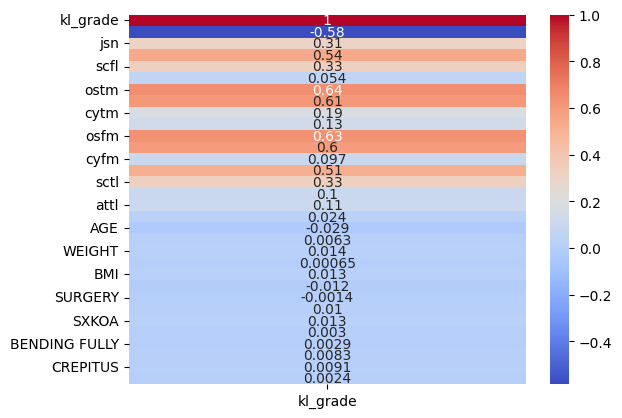

In [ ]:
#make a heatmap for correlation of kl_grade
sns.heatmap(data.corr().iloc[:,:1], annot=True, cmap='coolwarm')
data.corr().iloc[:,:1]

#test train split

In [ ]:
#X = data[["osteophytes","sctm","scfm","ostm","osfm","osfl","ostl"]]
X = X = data.drop("kl_grade", axis=1)
y = data["kl_grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
from colorsys import yiq_to_rgb
xgb_r = xg.XGBRegressor(random_state = 42,n_jobs=-1, tree_method='gpu_hist')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=2000,n_jobs = -1,max_features='log2',bootstrap = True,min_samples_split = 2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=2000, n_jobs=-1)

In [ ]:
y_pred = rf_regressor.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", MSE)
print("R-squared:", r2)
print(len(y_pred))

Mean Squared Error: 0.25029549805588835
R-squared: 0.8205849212003361
1459


In [ ]:
y_pred_rounded = np.round(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 0, 4)

# Print or store the rounded predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rounded})
print("predicted value:",{predictions_df['Predicted'].iloc[-1]},"\n","actual value:",{predictions_df['Actual'].iloc[-1]})

[0 1 2 3 4]
predicted value: {0} 
 actual value: {0}
